In [13]:
#%pip install qutip

## Floquet formalism in QuTiP

QuTiP provides a family of functions to calculate the Floquet modes and quasi energies, Floquet state decomposi- tion, etc., given a time-dependent Hamiltonian on the callback format, list-string format and list-callback format (see, e.g., qutip.mesolve for details).
Consider for example the case of a strongly driven two-level atom, described by the Hamiltonian

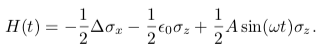


In [14]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

In QuTiP we can define this Hamiltonian as follows:

In [15]:
delta = 0.2 * 2*np.pi
eps0 = 1.0 * 2*np.pi
A = 2.5 * 2*np.pi
omega = 1.0 * 2*np.pi
H0 = - delta/2.0 * sigmax() - eps0/2.0 * sigmaz()
H1 = A/2.0 * sigmaz()
args = {'w': omega}
H = [H0, [H1, 'sin(w * t)']]

In [16]:
print(H)

[Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[-3.14159265 -0.62831853]
 [-0.62831853  3.14159265]], [Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 7.85398163  0.        ]
 [ 0.         -7.85398163]], 'sin(w * t)']]


The t =0 Floquet modes corresponding to the Hamiltonian can then be calculated using the FloquetBasis class, which encapsulates the Floquet modes and the quasienergies:

In [17]:
T = 2*np.pi / omega
floquet_basis = FloquetBasis(H, T, args)
f_energies = floquet_basis.e_quasi
f_energies 

array([-2.83131209,  2.83131209])

In [18]:
f_modes_0 = floquet_basis.mode(0)
f_modes_0 

[Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[ 0.72964233+0.j        ]
  [-0.39993746+0.55468198j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.39993746+0.55468198j]
  [0.72964233+0.j        ]]]

For some problems interesting observations can be draw from the quasi-energy levels alone.
Consider for example the quasi-energies for the driven two-level system introduced above as a
function of the driving amplitude, calculated and plotted in the following example. For certain
driving amplitudes the quasi-energy levels cross. Since the quasi-energies can be associated
with the time-scale of the long-term dynamics due that the driving, degenerate quasi-energies
indicates a freezing of the dynamics (sometimes known as coherent destruction of tunneling).

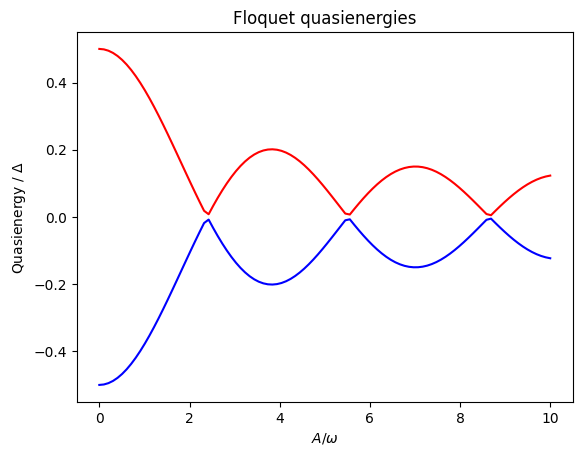

In [19]:
delta = 0.2 * 2 * np.pi
eps0  = 0.0 * 2 * np.pi
omega = 1.0 * 2 * np.pi
A_vec = np.linspace(0, 10, 100) * omega
T = (2 * np.pi) / omega
tlist = np.linspace(0.0, 10 * T, 101)
spsi0 = basis(2, 0)
q_energies = np.zeros((len(A_vec), 2))
H0 = delta / 2.0 * sigmaz() - eps0 / 2.0 * sigmax()
args = {'w': omega}
for idx, A in enumerate(A_vec): 
  H1 = A / 2.0 * sigmax() 
  H = [H0, [H1, lambda t, args: np.sin(args['w'] * t)]] 
  floquet_basis = FloquetBasis(H, T, args)
  q_energies[idx,:] = floquet_basis.e_quasi 
plt.figure() 
plt.plot(A_vec/omega, q_energies[:,0] / delta, 'b', A_vec/omega, q_energies[:,1] / delta, 'r') 
plt.xlabel(r'$A/\omega$') 
plt.ylabel(r'Quasienergy / $\Delta$') 
plt.title(r'Floquet quasienergies') 
plt.show() 

Given the Floquet modes at 
, we obtain the Floquet mode at some later time 
 using FloquetBasis.mode:

In [20]:
f_modes_t = floquet_basis.mode(2.5)
f_modes_t 

[Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-1.57826342e-05+2.85725880e-01j]
  [-9.58305164e-01+1.10445396e-05j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-9.58305164e-01-1.10445396e-05j]
  [ 1.57826342e-05+2.85725880e-01j]]]

The purpose of calculating the Floquet modes is to find the wavefunction solution to the
original Hamiltonian given some initial state . To do that, we first need to decompose the
initial state in the Floquet states, using the function qutip.floquet.floquet_state_decomposition

In [21]:
psi0 = rand_ket(2)
f_coeff = floquet_basis.to_floquet_basis(psi0)
f_coeff 

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.79493576+0.17986004j]
 [-0.41376507+0.405618j  ]]

and given this decomposition of the initial state in the Floquet states we can easily evaluate the wavefunction that is the solution to H at an arbitrary time 
 using the function FloquetBasis.from_floquet_basis:

In [22]:
t = 10 * np.random.rand()
psi_t = floquet_basis.from_floquet_basis(f_coeff, t)

The following example illustrates how to use the functions introduced above to calculate and plot the time-evolution of H.

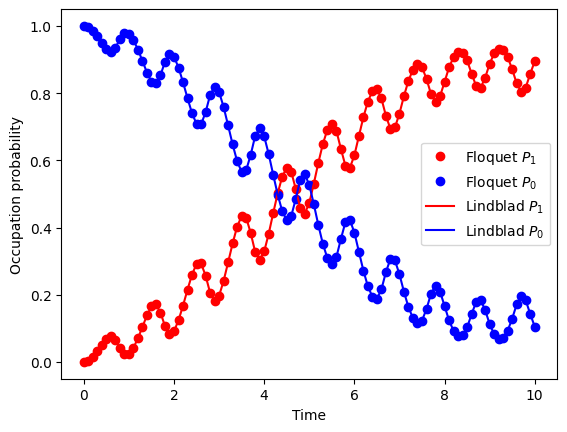

In [23]:
import numpy as np
from matplotlib import pyplot

import qutip

delta = 0.2 * 2*np.pi
eps0  = 1.0 * 2*np.pi
A     = 0.5 * 2*np.pi
omega = 1.0 * 2*np.pi
T      = (2*np.pi)/omega
tlist  = np.linspace(0.0, 10 * T, 101)
psi0   = qutip.basis(2, 0)

H0 = - delta/2.0 * qutip.sigmax() - eps0/2.0 * qutip.sigmaz()
H1 = A/2.0 * qutip.sigmaz()
args = {'w': omega}
H = [H0, [H1, lambda t, w: np.sin(w * t)]]

# Create the floquet system for the time-dependent hamiltonian
floquetbasis = qutip.FloquetBasis(H, T, args)

# decompose the inital state in the floquet modes
f_coeff = floquetbasis.to_floquet_basis(psi0)

# calculate the wavefunctions using the from the floquet modes coefficients
p_ex = np.zeros(len(tlist))
for n, t in enumerate(tlist):
    psi_t = floquetbasis.from_floquet_basis(f_coeff, t)
    p_ex[n] = qutip.expect(qutip.num(2), psi_t)

# For reference: calculate the same thing with mesolve
p_ex_ref = qutip.mesolve(H, psi0, tlist, [], [qutip.num(2)], args).expect[0]

# plot the results
pyplot.plot(tlist, np.real(p_ex),     'ro', tlist, 1-np.real(p_ex),     'bo')
pyplot.plot(tlist, np.real(p_ex_ref), 'r',  tlist, 1-np.real(p_ex_ref), 'b')
pyplot.xlabel('Time')
pyplot.ylabel('Occupation probability')
pyplot.legend(("Floquet $P_1$", "Floquet $P_0$", "Lindblad $P_1$", "Lindblad $P_0$"))
pyplot.show()

### Problema de um Átomo de Dois Níveis com Campo Linearmente Polarizado

#### Configuração do Hamiltoniano

Para um átomo de dois níveis com um campo linearmente polarizado, o Hamiltoniano pode ser escrito como:

$H(t) = \frac{\hbar \omega_0}{2} \sigma_z + \hbar \Omega \cos(\omega t) \sigma_x$

onde $\omega_0$ é a frequência de transição entre os dois níveis, $\Omega$ é a frequência de Rabi, e $\omega$ é a frequência de condução.

#### Evolução Numérica
Vamos utilizar a biblioteca qutip (Quantum Toolbox in Python) para evoluir o sistema de t = 0 ate t = T
Os estados resultantes em t=T formarão as colunas do operador de Floquet U(T,0).
Diagonalizamos o operador de Floquet U para encontrar seus valores próprios λi e vetores próprios vi⟩.

Expandimos o estado inicial ∣ψ(0)⟩ em termos dos estados de Floquet:

$|\psi(0)\rangle = \sum_i c_i |v_i\rangle$


$c_i = \langle v_i | \psi(0) \rangle$

#### Estado em Tempos Estroboscópicos
Calculamos o estado ∣ψ(nT)⟩ em tempos Estroboscópicos t=nT:

$|\psi(nT)\rangle = U^n |\psi(0)\rangle = \sum_i c_i \lambda_i^n |v_i\rangle$

Avaliamos ∣ψ(t)⟩ em Tempos Arbitrários

$|\psi(t)\rangle = \sum_i c_i e^{-\frac{i \epsilon_i t}{\hbar}} |u_i(t)\rangle$

onde $ \epsilon_i, |\mathbf{u}_i(t) \rangle $ são as quasi-energias e $ |u_i(t) \rangle $ são os modos de Floquet.

State at t = nT: Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-7.07149883e-01-0.00884455j]
 [-3.56239296e-08+0.70700831j]]


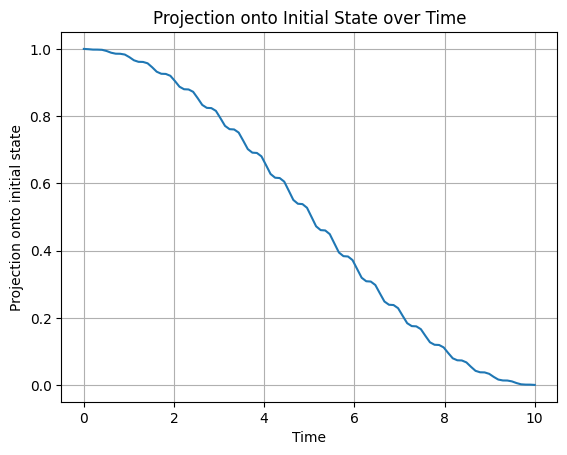

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define parameters
omega_0 = 1.0 * 2 * np.pi  # Transition frequency
Omega = 0.1 * 2 * np.pi    # Rabi frequency
omega = 1.0 * 2 * np.pi    # Driving frequency
T = 2 * np.pi / omega      # Period of the driving field
dtstep = 0.1

# Define Hamiltonian
H0 = 0.5 * omega_0 * sigmaz()
H1 = 0.5 * Omega * sigmax()

# Time-dependent Hamiltonian
H = [H0, [H1, 'cos(w * t)']]

# Define the time-dependent function
args = {'w': omega}

# Define initial state
psi0 = basis(2, 0)

# Time evolution
t_list = np.linspace(0, T, 1000)
result = mesolve(H, psi0, t_list, [], [], args=args)

# Floquet operator at t = T
U = propagator(H, T, [], args=args)

# Diagonalize the Floquet operator
eigvals, eigvecs = U.eigenstates()

# Initial state decomposition
coeffs = [eigvecs[i].overlap(psi0) for i in range(2)]

# State at stroboscopic times
nT = 5  # Number of periods
psi_nT = sum(coeffs[i] * (eigvals[i]**nT) * eigvecs[i] for i in range(2))

print("State at t = nT:", psi_nT)

# Projeção no estado inicial e plot
Nsteps = 100
vec = [psi0]
for i in range(1, Nsteps):
    t = i * dtstep
    U_t = propagator(H, t, [], args=args)
    vec.append(U_t * psi0)

projection = [abs(psi.overlap(psi0))**2 for psi in vec]
times = np.linspace(0, Nsteps*dtstep, Nsteps)

plt.plot(times, projection)
plt.xlabel('Time')
plt.ylabel('Projection onto initial state')
plt.title('Projection onto Initial State over Time')
plt.grid(True)
plt.show()